<a href="https://colab.research.google.com/github/nessy254/Customer_churn/blob/main/RFM_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RFM ANALYSIS USING PYTHON**  

RFM stands for Recency, Frequency and Monetary values. It is one of the most used way to segment customers. It helps identify customer behaviour based on their most recent purchase, the number of purchases they make and how much money they spend on products.

We are going to calculate the RFM of customers and assign them levels based on their scores

In [35]:
#import the necessary libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Load the data
data = pd.read_csv("rfm_data.csv")
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


Exploratory data analysis.


In this section we will check for null values, duplicates and the summary of our data which will be helpful for understanding the quality and characteristics of our data.


We will also check the number of customers per country and see that Tokyo has the highest number of customers.

Our dataset has a total of 6 columns and 1000 rows. Our columns are:


CustomerID            
PurchaseDate          
TransactionAmount   
ProductInformation   
OrderID               
Location

We have no missing values or duplicates in our dataset.


In [4]:
data.isna().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
data.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [7]:
#coverting our purchase date column to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [9]:
#Checking for duplicates -> there are no duplicates in our data
data.duplicated().sum()

0

<Axes: >

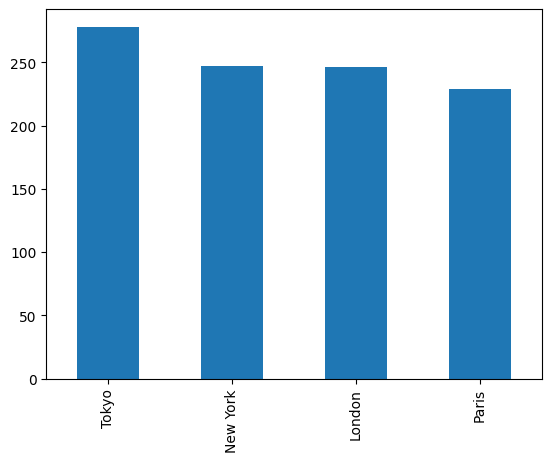

In [10]:
#customers per country --> Tokyo has the highest number of customers
data.Location.value_counts()[:10].plot(kind='bar')

**RFM ANALYSIS**

We are going to calculate the recency frequency and monetary values.

The recency value gives us the number of days since the last purchase, the frequency value represents the number of times purchases have been made by the customer while monetary values represents the amountof money spent by the customer on the products.

To calculate the recency, we will first convert our purchaseDate column to datetime using the pandas to_datetime functions. We will then check the min and max values of our purchaseDate, then assign a current date to subtract from(in this case I am using my recent date as '2023-06-11') to get the number of days since the last purchase.

For the frequency value we will group the data by CustomerID and count the number of unique OrderID values to determine the number of purchases made by each customer..

The monetary value for each customer will be gotten by grouping the data by CustomerID and summing the TransactionAmount values to calculate the total amount spent by each customer.

These calculations will help us understand customer behaviourwhich will help in understanding and segmenting customers for targeted marketing strategies.

In [11]:
#calculating the recency frequency and monetary values
data['PurchaseDate'].min(),data['PurchaseDate'].max()

(Timestamp('2023-04-11 00:00:00'), Timestamp('2023-06-10 00:00:00'))

In [12]:
from datetime import datetime
present_day = datetime.strptime("2023-06-11", "%Y-%m-%d")
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data.head()

RFM= data.groupby('CustomerID').agg({'PurchaseDate': lambda date: (present_day - date.max()).days,
                                        'OrderID': lambda num: len(num),
                                        'TransactionAmount': lambda price: price.sum()})

In [13]:
RFM.columns

Index(['PurchaseDate', 'OrderID', 'TransactionAmount'], dtype='object')

In [14]:
RFM.columns=['Recency', 'Frequency', 'Monetary']

In [15]:
RFM.head(10)


,Recency,Frequency,Monetary
CustomerID,,,
1011,34,2,1129.02
1025,22,1,359.29
1029,1,1,704.99
1046,44,1,859.82
1049,14,1,225.72
1082,25,1,600.69
1086,10,1,100.18
1104,35,1,146.12
1108,29,1,883.21


In [16]:
#calculating quantile of the RFM values
recency_scores = [4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3,4]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4]

RFM['F_score'] = pd.cut(RFM['Frequency'], bins = 4, labels = frequency_scores)
RFM['R_score'] = pd.cut(RFM['Recency'], bins = 4, labels = recency_scores)
RFM['M_score'] = pd.cut(RFM['Monetary'], bins = 4, labels = monetary_scores)

In [17]:
RFM.head()

,Recency,Frequency,Monetary,F_score,R_score,M_score
CustomerID,,,,,,
1011,34,2,1129.02,2,2,2
1025,22,1,359.29,1,3,1
1029,1,1,704.99,1,4,2
1046,44,1,859.82,1,2,2
1049,14,1,225.72,1,4,1


In [21]:
#Grouping the RFM values
RFM['RFM_group'] = RFM[['R_score', 'F_score', 'M_score']].apply(lambda v: '-'.join(v.astype(str)), axis = 1)


In [26]:
#Finding the total RFM score
RFM['TOTAL_RFM'] = RFM[['R_score', 'F_score', 'M_score']].sum(axis = 1)
RFM.head()

,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_group,TOTAL_RFM,RFM_level
CustomerID,,,,,,,,,
1011,34,2,1129.02,2,2,2,2-2-2,6,Average
1025,22,1,359.29,1,3,1,3-1-1,5,Low value
1029,1,1,704.99,1,4,2,4-1-2,7,Average
1046,44,1,859.82,1,2,2,2-1-2,5,Low value
1049,14,1,225.72,1,4,1,4-1-1,6,Average


In [29]:
#grouping customers based on their score. High value, low value , potential_loyal, at risk
# Create a new column for RFM levels
RFM['RFM_level'] = ''

# Assign RFM levels based on the RFM score
RFM.loc[RFM['TOTAL_RFM'] >= 9, 'RFM_level'] = 'High level'
RFM.loc[(RFM['TOTAL_RFM'] >= 6) & (RFM['TOTAL_RFM'] < 9), 'RFM_level'] = "Medium level"
RFM.loc[(RFM['TOTAL_RFM'] >= 3) & (RFM['TOTAL_RFM'] < 6), 'RFM_level'] = "Low level"

RFM.head()

,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_group,TOTAL_RFM,RFM_level
CustomerID,,,,,,,,,
1011,34,2,1129.02,2,2,2,2-2-2,6,Medium level
1025,22,1,359.29,1,3,1,3-1-1,5,Low level
1029,1,1,704.99,1,4,2,4-1-2,7,Medium level
1046,44,1,859.82,1,2,2,2-1-2,5,Low level
1049,14,1,225.72,1,4,1,4-1-1,6,Medium level


We have 574 low level, 360 medium level and 12 low level customers respectively.
Most of the customers are on the low level segment with the high level having the least number of customers. From this we can assume that the company needs to make some adjustments so as to increase the number of customers on the high level segment.
Increasing the number of high-level customers will not only improve revenue but also enhance the company's reputation and customer loyalty.

In [33]:
#calculating the number of values in each level
RFM_level_count = RFM['RFM_level'].value_counts()
RFM_level_count

Low level       574
Medium level    360
High level       12
Name: RFM_level, dtype: int64

<Axes: >

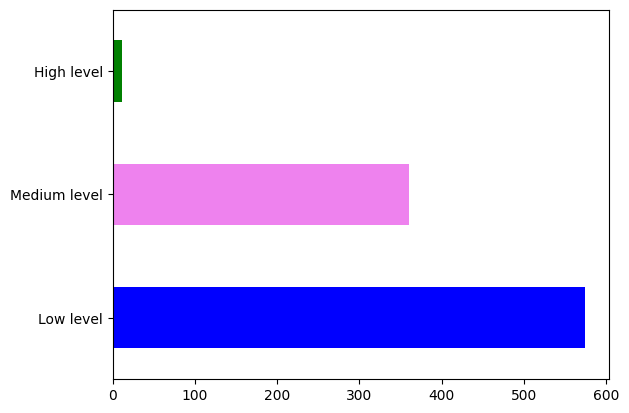

In [38]:
#plotting the values for each level
RFM_level_count.plot(kind="barh", color=["Blue","Violet","Green"])